In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'Number of objects')

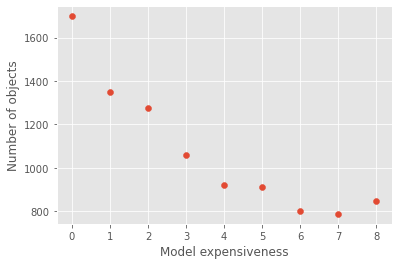

In [40]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_EfficientDet"]["stats"]

f1s = []
scores = []
nobjs = []

for idx in range(9):
    config = {
        'app': 'EfficientDet-d%d' % idx,
        'input': "videos/dashcam/dashcam_126/part%d.mp4",
    }

    result = list(db.find(config))
    
    avg_f1 = np.mean([i['f1'] for i in result])
    avg_score = np.mean([i['mean_sum_score'] for i in result])
    avg_nobj = np.mean([i['tp'] + i['fp'] for i in result])
    
    # print(avg_score)
    
    
    f1s.append(avg_f1)
    scores.append(avg_score)
    nobjs.append(avg_nobj)
    
    
plt.scatter(range(9), nobjs)
plt.xlabel('Model expensiveness')
plt.ylabel('Number of objects')
    
    

66.23414192825068
53.18856355010486
48.51033520307697
40.734845208340005
31.71178780227411
29.958511446343092
27.84177917730613
25.509949199488904
27.04534743262119


Text(0, 0.5, 'F1 score')

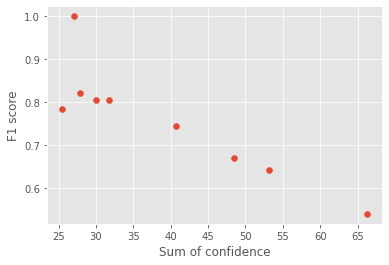

In [38]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_EfficientDet"]["stats"]

f1s = []
scores = []

for idx in range(9):
    config = {
        'app': 'EfficientDet-d%d' % idx,
        'input': "videos/dashcam/dashcam_126/part%d.mp4",
    }

    result = list(db.find(config))
    
    avg_f1 = np.mean([i['f1'] for i in result])
    avg_score = np.mean([i['mean_count_score'] for i in result])
    
    print(avg_score)
    
    
    f1s.append(avg_f1)
    scores.append(avg_score)
    
    
plt.scatter(scores, f1s)
plt.xlabel('Sum of confidence')
plt.ylabel('F1 score')
    
    

61
90.12033031025871
61
90.99473746878202
61
91.7135814604212
61
92.29711964091317
61
92.63416002617508
61
92.8701633390833
61
92.99497310450819
61
93.03058023921778
61
93.05631049734647
61
93.11975454111568
61
93.10060832539543
61
93.06044487875016
61
92.93507310210681
61
92.82614742341589
61
92.64283627369365


Text(0, 0.5, 'F1 score')

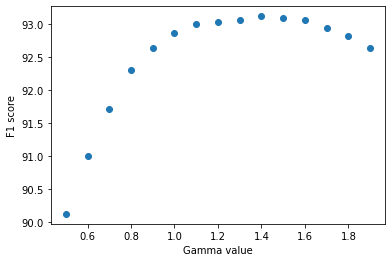

In [35]:
import matplotlib.pyplot as plt
import pymongo
import numpy as np

# db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_gamma"]["stats"]
db = pymongo.MongoClient("mongodb://localhost:27017/")["diff_gamma"]["stats"]

f1s = []
scores = []

gammas = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]

for gamma in gammas:
    config = {
        # 'app': 'EfficientDet-d%d' % idx,
        'input': "videos/dashcam/dashcam_126/part%d.mp4",
        "gamma": gamma,
    }

    result = list(db.find(config))
    print(len(result))
    
    # avg_f1 = np.mean([i['f1'] for i in result])
    avg_score = np.mean([i['mean_count_score'] for i in result])
    
    print(avg_score)
    
    
    # f1s.append(avg_f1)
    scores.append(avg_score)
    
    
plt.scatter(gammas, scores)
plt.xlabel('Gamma value')
plt.ylabel('F1 score')
    
    

In [1]:
import eval
import yaml
import yaml
import matplotlib.pyplot as plt
plt.style.use('ggplot')

stats = yaml.load(open(f'stats_cityscape_0', 'r'))


/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


Text(0, 0.5, 'F1 score')

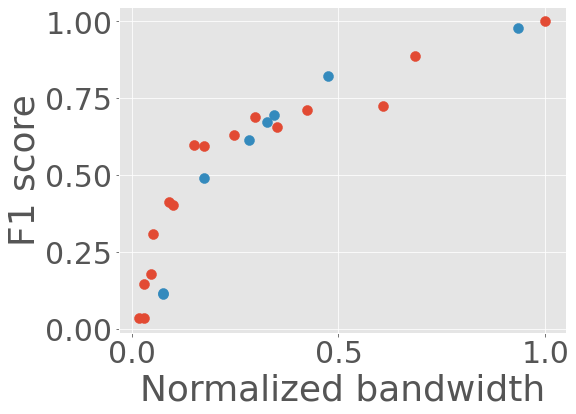

In [15]:


awstream = eval.get_awstream(stats, 0, 20)
overall = eval.get_all(stats, 0,20)
diff = [eval.get_diff(stats, 'diff_results_new/stuttgart_0_Adam_lr_0.5_qp_1_res_1_fr_1_bwweight_%d.txt' % i, 4, 0, 20) for i in  [2,6,10,15,20,25,60,200]]

fig, ax = plt.subplots(figsize=(8, 6))
plt.rcParams["font.size"] = 30

# ax.scatter([i[0] for i in overall], [i[1] for i in overall], s=100)
ax.scatter([i[0] for i in awstream], [i[1] for i in awstream], s=100)
ax.scatter([i[0] for i in diff], [i[1] for i in diff], s=100)
ax.set_xlabel('Normalized bandwidth')
ax.set_ylabel('F1 score')
# plt.scatter([i[0] for i in diff], [i[1] for i in diff])


In [ ]:
sec0[-1]

[1e-07, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()


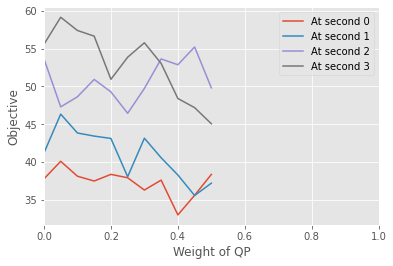

In [3]:
from collections import defaultdict
secs = [1e-7, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.9, 0.95, 1]
# secs = [secs[i] for i in range(len(secs)) if i%4 in [0, 1]]

print(secs)

results = defaultdict(dict)

for i, sec in enumerate(secs):

    temp = yaml.load(open(f'diff_results_old_objective/stuttgart_0_static_qp_{sec}_res_1.0_fr_1.0.txt', 'r'))

    for time, entry in enumerate(temp):
        results[i][time] = entry


for time in range(4):
    plt.plot(secs, [results[i][time]['fuse_obj'] for i in range(len(secs))], label=f'At second {time}')
plt.xlabel('Weight of QP')
plt.xlim(0, 1)
plt.ylabel('Objective')
plt.legend()

In [7]:
from collections import defaultdict
secs = [1e-6, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.9, 0.95, 1]


print(secs)

results = defaultdict(dict)

for i, sec in enumerate(secs):

    temp = yaml.load(open(f'diff_results_dense_interp/stuttgart_0_lr_0.0_qp_{sec}_res_1e-06_fr_1e-06.txt', 'r'))

    for time, entry in enumerate(temp):
        results[i][time] = entry

[1e-06, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.9, 0.95, 1]
/data2/kuntai/envs/dds/lib/python3.7/site-packages/ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()


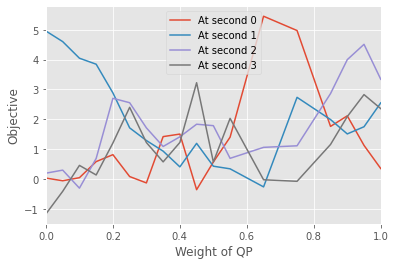

In [14]:

for time in range(4):
    plt.plot(secs, [results[i][time]['fuse_obj'] for i  in range(len(secs))], label=f'At second {time}')
# for time in range(4, 5):
#     plt.plot(secs, [results[i][time]['true_obj'] for i in range(len(secs))], label=f'At second {time}')
plt.xlim(0, 1)
plt.xlabel('Weight of QP')
plt.ylabel('Objective')
plt.legend()

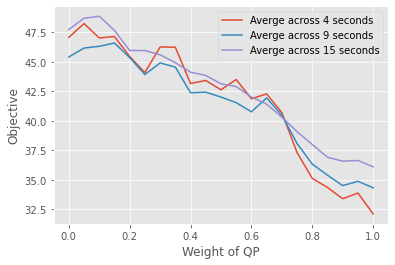

In [20]:
import numpy as np
plt.xlabel('Weight of QP')
plt.ylabel('Objective')
plt.plot(secs, [np.mean([results[i][time]['fuse_obj'] for time in range(4)]) for i in range(len(secs))], label='Averge across 4 seconds')
plt.plot(secs, [np.mean([results[i][time]['fuse_obj'] for time in range(9)]) for i in range(len(secs))], label='Averge across 9 seconds')
plt.plot(secs, [np.mean([results[i][time]['fuse_obj'] for time in range(15)]) for i in range(len(secs))], label='Averge across 15 seconds')
plt.legend()